Small name dataset

In [1]:
# https://keras.io/
#!pip install -q keras
#!pip install scikit-learn
#!pip install matplotlib
%matplotlib inline
import itertools
import keras
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [25]:
from tokenize import tokenize, untokenize, NUMBER, STRING, NAME, OP
from io import BytesIO

def decistmt(s, keywords):
    
    result = []
    g = tokenize(BytesIO(s.encode('utf-8')).readline)
    #BytesIO(s.encode('utf-8')).readline)  # tokenize the string
    toktemp = ""
    for toknum, tokval, tok1, tok2, tok3 in g:
        if tokval == "$":
            toktemp = "$"
            continue
        else:
            if toknum == 59:
                continue
            #print(toknum," _______ ",tokval)
            if toknum == 3:
                tokval = "DATA"
            elif toknum == 4:
                continue
            elif toknum == 2:
                tokval = "NUMBER"
            elif toknum == 1:
                if (toktemp+tokval) not in keys:
                    tokval = "VAR"
                    toktemp = ""
            elif toknum == 53:
                if toktemp == "$":
                    result.append("VARACCESS")
                    toktemp = ""
                if tokval == ".":
                    tokval = "DOT"
                elif tokval == "//":
                    tokval = "DOUBLESLASH"
                elif tokval == "@":
                    tokval = "QUOTES"
                elif tokval == "^":
                    tokval = "RPAR"
                elif tokval == "*":
                    tokval = "RBRACE"
                elif tokval == ",":
                    tokval = "COMMA"
                elif tokval == ")":
                    tokval = "RPAR"
                elif tokval == "(":
                    tokval = "LPAR"
                elif tokval == "{":
                    tokval = "LBRACE"
                elif tokval == "}":
                    tokval = "RBRACE"
                elif tokval == "[":
                    tokval = "LSQB"
                elif tokval == "]":
                    tokval = "RSQB"
                elif tokval == ":":
                    tokval = "COLON"
                elif tokval == ";":
                    tokval = "SEMICOLON"
                elif tokval == "/":
                    tokval = "SLASH"
                elif tokval in ["<", ">", "<=",">=","!=","+","-","==","=","%","&","||","|","+=","-=","/=","%=","*=","->","<-"]:
                    tokval = "OPERATOR"
                else:
                    tokval = tokval
            elif toknum == 0:
                
                tokval = "EOL"
                
            
            if toknum != 56:
                result.append(toktemp+tokval)
            toktemp=""
    #return untokenize(result).decode('utf-8')
    return result


def decistmt2(s, keywords):
    result = []
    g = tokenize(BytesIO(s.encode('utf-8')).readline)
    #BytesIO(s.encode('utf-8')).readline)  # tokenize the string
    toktemp = ""
    for toknum, tokval, tok1, tok2, tok3 in g:
        if tokval == "$":
            toktemp = "$"
            continue
        else:
            if toknum == 59:
                continue
            #print(toknum," _______ ",tokval)
            if toknum == 3:
                tokval = "DATA"
            elif toknum == 4:
                continue
            elif toknum == 2:
                tokval = "NUMBER"
            elif toknum == 1:
                if (toktemp+tokval) not in keys:
                    tokval = "VAR"
                    toktemp = ""
            elif toknum == 53:
                if toktemp == "$":
                    result.append("VARACCESS")
                    toktemp = ""
                if tokval == ".":
                    tokval = "DOT"
                elif tokval == "//":
                    tokval = "DOUBLESLASH"
                elif tokval == "@":
                    tokval = "QUOTES"
                elif tokval == "^":
                    tokval = "RPAR"
                elif tokval == "*":
                    tokval = "RBRACE"
                elif tokval == ",":
                    tokval = "COMMA"
                elif tokval == ")":
                    tokval = "RPAR"
                elif tokval == "(":
                    tokval = "LPAR"
                elif tokval == "{":
                    tokval = "LBRACE"
                elif tokval == "}":
                    tokval = "RBRACE"
                elif tokval == "[":
                    tokval = "LSQB"
                elif tokval == "]":
                    tokval = "RSQB"
                elif tokval == ":":
                    tokval = "COLON"
                elif tokval == ";":
                    tokval = "SEMICOLON"
                elif tokval == "/":
                    tokval = "SLASH"
                elif tokval in ["<", ">", "<=",">=","!=","+","-","==","=","%","&","||","|","+=","-=","/=","%=","*=","->","<-"]:
                    tokval = "OPERATOR"
                else:
                    tokval = tokval
            elif toknum == 0:
                
                tokval = "EOL"
                
            
            if toknum != 56:
                result.append(toktemp+tokval)
            toktemp=""
    #return untokenize(result).decode('utf-8')
    return result



keys = []

keys = [line.rstrip('\n\t') for line in open("keywords.txt","r")]
print(keys)

['$abs', '$add', '$addFields', '$addToSet', '$all', '$allElementsTrue', '$and', '$anyElementTrue', '$arrayElemAt', '$arrayToObject', '$avg', '$bit', '$bitsAllClear', '$bitsAllSet', '$bitsAnyClear', '$bitsAnySet', '$box', '$bucket', '$bucketAuto', '$caseSensitive', '$ceil', '$center', '$centerSphere', '$cmp', '$collStats', '$comment', '$concat', '$concatArrays', '$cond', '$count', '$currentDate', '$currentOp', '$dateFromParts', '$dateFromString', '$dateToParts', '$dateToString', '$dayOfMonth', '$dayOfWeek', '$dayOfYear', '$diacriticSensitive', '$divide', '$each', '$elemMatch', '$eq', '$exists', '$exp', '$explain', '$expr', '$facet', '$filter', '$first', '$floor', '$geoIntersects', '$geometry', '$geoNear', '$geoWithin', '$graphLookup', '$group', '$gt', '$gte', '$hint', '$hour', '$ifNull', '$in', '$inc', '$indexOfArray', '$indexOfBytes', '$indexOfCP', '$indexStats', '$isArray', '$isoDayOfWeek', '$isoWeek', '$isoWeekYear', '$jsonSchema', '$language', '$last', '$limit', '$listLocalSessions'

In [4]:
import pandas as pd
import numpy as np
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding, Bidirectional
from keras.layers import LSTM, GRU
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix

In [26]:


# Lowering the texts and replacing with numeral value
#df = pd.read_csv('./namedata.csv', encoding='utf-8')
#df.columns = ['bn_name', 'en_name', 'gender']
#df['en_name'] = df['en_name'].str.lower()
#df['gender'] = df['gender'].str.lower()
#df = df.dropna()
#df['gender'] = df['gender'].str.replace('f', '0').replace('m', '1')

# Getting all available strings to find out the characters used
#all_string = " ".join([name for name in df['en_name']])
#unique_characters = list(set(list(all_string)))

# Mapping between character to index and index to character
char2idx = { c : i for i, c in enumerate(keys) }
idx2char = {c: k for k, c in char2idx.items()}

def remove_values_from_list(the_list, val):
    return [value for value in the_list if value != val]


# Converts a name into vector
def name2vector(name):
    chars = name
    vector = [ char2idx[c] for c in chars ]
    return np.array(vector)

# Converts names to fixed size tensor
def names2tensor(names):#, maxlen=10):
    namelist = [name2vector(name) for name in names]
    return sequence.pad_sequences(np.array(namelist))

# train dataset

with open("data.txt", "r") as fo:
    lines = fo.readlines()
tokens = []
for s in lines:
    print(s)
    tok = decistmt(s,keys)
    tokens.append(tok)
    print(tok)
#print(tokens)
#print("haha\n\n")
#print(lines)
#lines = remove_values_from_list(lines, "\n")
count_tok=0;
for tok in tokens:
    count_tok+=1
    #print(count_tok)
    #print(tok)
    


db.mycol.find({$and:[{by:"tutorials point"},{title: "MongoDB Overview"}]}).pretty()

['db', 'DOT', 'VAR', 'DOT', 'find', 'LPAR', 'LBRACE', '$and', 'COLON', 'LSQB', 'LBRACE', 'VAR', 'COLON', 'DATA', 'RBRACE', 'COMMA', 'LBRACE', 'title', 'COLON', 'DATA', 'RBRACE', 'RSQB', 'RBRACE', 'RPAR', 'DOT', 'pretty', 'LPAR', 'RPAR', 'EOL']
db.collection('users').findOne({username: {$ne: null}, password: {$ne: null}})

['db', 'DOT', 'VAR', 'LPAR', 'DATA', 'RPAR', 'DOT', 'findOne', 'LPAR', 'LBRACE', 'VAR', 'COLON', 'LBRACE', '$ne', 'COLON', 'null', 'RBRACE', 'COMMA', 'VAR', 'COLON', 'LBRACE', '$ne', 'COLON', 'null', 'RBRACE', 'RBRACE', 'RPAR', 'EOL']
Document.find({ type: { $gte: ""} })

['VAR', 'DOT', 'find', 'LPAR', 'LBRACE', 'type', 'COLON', 'LBRACE', '$gte', 'COLON', 'DATA', 'RBRACE', 'RBRACE', 'RPAR', 'EOL']
Document.find({ type: { $ne: 0} })

['VAR', 'DOT', 'find', 'LPAR', 'LBRACE', 'type', 'COLON', 'LBRACE', '$ne', 'COLON', 'NUMBER', 'RBRACE', 'RBRACE', 'RPAR', 'EOL']
db.books.insert({ title: 

['db', 'DOT', 'VAR', 'DOT', 'find', 'LPAR', 'LBRACE', '$or', 'COLON', 'LSQB', 'LBRACE', 'VAR', 'DOT', 'VAR', 'COLON', 'DATA', 'RBRACE', 'COMMA', 'LBRACE', 'VAR', 'COLON', 'NUMBER', 'RBRACE', 'RSQB', 'RBRACE', 'RPAR', 'EOL']
db.collection.find({ $or: [{name: "john"}, {age: {$lt: 35}}] })

['db', 'DOT', 'VAR', 'DOT', 'find', 'LPAR', 'LBRACE', '$or', 'COLON', 'LSQB', 'LBRACE', 'VAR', 'COLON', 'DATA', 'RBRACE', 'COMMA', 'LBRACE', 'VAR', 'COLON', 'LBRACE', '$lt', 'COLON', 'NUMBER', 'RBRACE', 'RBRACE', 'RSQB', 'RBRACE', 'RPAR', 'EOL']
db.collection.find({ $or: [{name: "john"}, {age: {$lte: 35}}] })

['db', 'DOT', 'VAR', 'DOT', 'find', 'LPAR', 'LBRACE', '$or', 'COLON', 'LSQB', 'LBRACE', 'VAR', 'COLON', 'DATA', 'RBRACE', 'COMMA', 'LBRACE', 'VAR', 'COLON', 'LBRACE', '$lte', 'COLON', 'NUMBER', 'RBRACE', 'RBRACE', 'RSQB', 'RBRACE', 'RPAR', 'EOL']
db.collection.find({ $or: [{name: "john"}, {age: {$gt: 35}}] })

['db', 'DOT', 'VAR', 'DOT', 'find', 'LPAR', 'LBRACE', '$or', 'COLON', 'LSQB', 'LBRACE',

In [27]:
lines = []
count = 0;
f = open("dataset_label.txt", "r")
line = f.readline().strip("\n")
lines.append(int(line))
while (len(line) != 0):
    line = f.readline().strip("\n")
    if len(line) == 0:
        break
    lines.append(int(line))
    count+=1
             
print(count)
print(lines)

999
[0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [28]:
import keras.backend as K
def recall(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision(y_true, y_pred):
    """Precision metric.

    Only computes a batch-wise average of precision.

    Computes the precision, a metric for multi-label classification of
    how many selected items are relevant.
    """
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def fbeta_score(y_true, y_pred, beta=1):
    """Computes the F score.

    The F score is the weighted harmonic mean of precision and recall.
    Here it is only computed as a batch-wise average, not globally.

    This is useful for multi-label classification, where input samples can be
    classified as sets of labels. By only using accuracy (precision) a model
    would achieve a perfect score by simply assigning every class to every
    input. In order to avoid this, a metric should penalize incorrect class
    assignments as well (recall). The F-beta score (ranged from 0.0 to 1.0)
    computes this, as a weighted mean of the proportion of correct class
    assignments vs. the proportion of incorrect class assignments.

    With beta = 1, this is equivalent to a F-measure. With beta < 1, assigning
    correct classes becomes more important, and with beta > 1 the metric is
    instead weighted towards penalizing incorrect class assignments.
    """
    if beta < 0:
        raise ValueError('The lowest choosable beta is zero (only precision).')

    # If there are no true positives, fix the F score at 0 like sklearn.
    if K.sum(K.round(K.clip(y_true, 0, 1))) == 0:
        return 0

    p = precision(y_true, y_pred)
    r = recall(y_true, y_pred)
    bb = beta ** 2
    fbeta_score = (1 + bb) * (p * r) / (bb * p + r + K.epsilon())
    return fbeta_score


def fmeasure(y_true, y_pred):
    """Computes the f-measure, the harmonic mean of precision and recall.

    Here it is only computed as a batch-wise average, not globally.
    """
    return fbeta_score(y_true, y_pred, beta=1)

In [29]:
from keras.callbacks import ModelCheckpoint

X = np.array(names2tensor(tokens))#np.array(names2tensor(df['en_name']))
Y = np.array(lines)

X, Y = shuffle(X, Y, random_state=42)

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

print(x_train.shape)

# max features
max_features = 20000
batch_size = 32
epochs = 250

# Model building and training
print('Build model...')
model = Sequential()
model.add(Embedding(max_features, 128))
#model.add(LSTM(128, dropout=0.5, recurrent_dropout=0.3, return_sequences=True))
#model.add(Dense(128 activation='relu'))
model.add(LSTM(64, dropout=0.5, recurrent_dropout=0.5))
model.add(Dense(1, activation='relu'))

# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy', recall, precision,fmeasure]             
             )
# checkpoint
filepath="F:/Class materials/L4T1/Thesis Materials/RNN/weights-improvement-{epoch:02d}-{val_recall:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_recall', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]
print('Train...')
model.fit(x_train, y_train,batch_size=batch_size, epochs=epochs,  validation_data=(x_test, y_test))

(800, 213)
Build model...
Train...
Train on 800 samples, validate on 200 samples
Epoch 1/250
800/800 [==============================] - 11s 14ms/step - loss: 0.5115 - acc: 0.8050 - recall: 0.0000e+00 - precision: 0.0000e+00 - fmeasure: 0.0000e+00 - val_loss: 0.4658 - val_acc: 0.7850 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00 - val_fmeasure: 0.0000e+00
Epoch 2/250
800/800 [==============================] - 11s 14ms/step - loss: 0.4056 - acc: 0.8062 - recall: 0.0200 - precision: 0.0400 - fmeasure: 0.0267 - val_loss: 0.3208 - val_acc: 0.7850 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00 - val_fmeasure: 0.0000e+00
Epoch 3/250
800/800 [==============================] - 11s 14ms/step - loss: 0.3612 - acc: 0.8837 - recall: 0.4043 - precision: 0.8500 - fmeasure: 0.5170 - val_loss: 0.1988 - val_acc: 0.9200 - val_recall: 0.7359 - val_precision: 0.8693 - val_fmeasure: 0.7885
Epoch 4/250
800/800 [==============================] - 11s 13ms/step - loss: 0.3187 - acc: 0.8950 - recall

800/800 [==============================] - 9s 11ms/step - loss: 0.2221 - acc: 0.9037 - recall: 0.7913 - precision: 0.9382 - fmeasure: 0.8399 - val_loss: 0.3227 - val_acc: 0.8850 - val_recall: 0.8349 - val_precision: 0.9733 - val_fmeasure: 0.8903
Epoch 33/250
800/800 [==============================] - 10s 12ms/step - loss: 0.1816 - acc: 0.8762 - recall: 0.8037 - precision: 0.9214 - fmeasure: 0.8443 - val_loss: 0.3189 - val_acc: 0.8550 - val_recall: 0.9105 - val_precision: 0.9505 - val_fmeasure: 0.9252
Epoch 34/250
800/800 [==============================] - 10s 13ms/step - loss: 0.1883 - acc: 0.8837 - recall: 0.8859 - precision: 0.9095 - fmeasure: 0.8858 - val_loss: 0.3206 - val_acc: 0.8700 - val_recall: 0.8527 - val_precision: 0.9733 - val_fmeasure: 0.9023
Epoch 35/250
800/800 [==============================] - 12s 15ms/step - loss: 0.1677 - acc: 0.8850 - recall: 0.8071 - precision: 0.9303 - fmeasure: 0.8498 - val_loss: 0.3320 - val_acc: 0.8650 - val_recall: 0.8527 - val_precision: 0.97

Epoch 64/250
800/800 [==============================] - 11s 14ms/step - loss: 0.1633 - acc: 0.9250 - recall: 0.8819 - precision: 0.9367 - fmeasure: 0.8983 - val_loss: 0.2557 - val_acc: 0.9050 - val_recall: 0.8705 - val_precision: 0.9733 - val_fmeasure: 0.9129
Epoch 65/250
800/800 [==============================] - 10s 13ms/step - loss: 0.2355 - acc: 0.8950 - recall: 0.8449 - precision: 0.9023 - fmeasure: 0.8661 - val_loss: 0.3108 - val_acc: 0.9000 - val_recall: 0.8527 - val_precision: 0.9733 - val_fmeasure: 0.9023
Epoch 66/250
800/800 [==============================] - 10s 12ms/step - loss: 0.1859 - acc: 0.8912 - recall: 0.8130 - precision: 0.9291 - fmeasure: 0.8556 - val_loss: 0.3180 - val_acc: 0.8850 - val_recall: 0.8705 - val_precision: 0.9733 - val_fmeasure: 0.9129
Epoch 67/250
800/800 [==============================] - 10s 12ms/step - loss: 0.2785 - acc: 0.8850 - recall: 0.8959 - precision: 0.8939 - fmeasure: 0.8836 - val_loss: 0.3186 - val_acc: 0.8800 - val_recall: 0.8705 - val_p

Epoch 96/250
800/800 [==============================] - 9s 11ms/step - loss: 0.1338 - acc: 0.8950 - recall: 0.8664 - precision: 0.8962 - fmeasure: 0.8700 - val_loss: 0.3749 - val_acc: 0.8900 - val_recall: 0.8705 - val_precision: 0.9733 - val_fmeasure: 0.9129
Epoch 97/250
800/800 [==============================] - 9s 11ms/step - loss: 0.1178 - acc: 0.8925 - recall: 0.8480 - precision: 0.8995 - fmeasure: 0.8626 - val_loss: 0.3749 - val_acc: 0.8900 - val_recall: 0.8705 - val_precision: 0.9733 - val_fmeasure: 0.9129
Epoch 98/250
800/800 [==============================] - 9s 11ms/step - loss: 0.2120 - acc: 0.8837 - recall: 0.8815 - precision: 0.8690 - fmeasure: 0.8637 - val_loss: 0.3300 - val_acc: 0.7700 - val_recall: 0.9238 - val_precision: 0.6880 - val_fmeasure: 0.7773
Epoch 99/250
800/800 [==============================] - 9s 11ms/step - loss: 0.4528 - acc: 0.8275 - recall: 0.9664 - precision: 0.6751 - fmeasure: 0.7810 - val_loss: 0.2907 - val_acc: 0.8750 - val_recall: 0.8838 - val_preci

800/800 [==============================] - 9s 11ms/step - loss: 0.2156 - acc: 0.8938 - recall: 0.4647 - precision: 0.8953 - fmeasure: 0.5926 - val_loss: 0.3964 - val_acc: 0.9300 - val_recall: 0.6654 - val_precision: 1.0000 - val_fmeasure: 0.7733
Epoch 128/250
800/800 [==============================] - 9s 11ms/step - loss: 0.1759 - acc: 0.9125 - recall: 0.6036 - precision: 0.9660 - fmeasure: 0.7206 - val_loss: 0.3823 - val_acc: 0.9400 - val_recall: 0.7187 - val_precision: 1.0000 - val_fmeasure: 0.8280
Epoch 129/250
800/800 [==============================] - 9s 11ms/step - loss: 0.1788 - acc: 0.9125 - recall: 0.6193 - precision: 0.9093 - fmeasure: 0.7145 - val_loss: 0.3707 - val_acc: 0.9500 - val_recall: 0.7632 - val_precision: 1.0000 - val_fmeasure: 0.8575
Epoch 130/250
800/800 [==============================] - 9s 11ms/step - loss: 0.1834 - acc: 0.9138 - recall: 0.6819 - precision: 0.8976 - fmeasure: 0.7519 - val_loss: 0.3590 - val_acc: 0.9550 - val_recall: 0.8260 - val_precision: 0.97

800/800 [==============================] - 9s 12ms/step - loss: 0.2458 - acc: 0.9187 - recall: 0.8205 - precision: 0.8308 - fmeasure: 0.8128 - val_loss: 0.3689 - val_acc: 0.9000 - val_recall: 0.9105 - val_precision: 0.8785 - val_fmeasure: 0.8860
Epoch 159/250
800/800 [==============================] - 9s 12ms/step - loss: 0.1659 - acc: 0.9325 - recall: 0.9131 - precision: 0.8366 - fmeasure: 0.8668 - val_loss: 0.3572 - val_acc: 0.9100 - val_recall: 0.8927 - val_precision: 0.9185 - val_fmeasure: 0.8968
Epoch 160/250
800/800 [==============================] - 9s 12ms/step - loss: 0.1534 - acc: 0.9200 - recall: 0.9060 - precision: 0.8100 - fmeasure: 0.8488 - val_loss: 0.3595 - val_acc: 0.9050 - val_recall: 0.9105 - val_precision: 0.9007 - val_fmeasure: 0.8990
Epoch 161/250
800/800 [==============================] - 9s 12ms/step - loss: 0.1499 - acc: 0.9387 - recall: 0.8893 - precision: 0.8503 - fmeasure: 0.8626 - val_loss: 0.3432 - val_acc: 0.9150 - val_recall: 0.8927 - val_precision: 0.97

800/800 [==============================] - 10s 12ms/step - loss: 0.1360 - acc: 0.9312 - recall: 0.8942 - precision: 0.9253 - fmeasure: 0.8965 - val_loss: 0.3852 - val_acc: 0.9050 - val_recall: 0.8527 - val_precision: 0.9733 - val_fmeasure: 0.9023
Epoch 190/250
800/800 [==============================] - 10s 12ms/step - loss: 0.1438 - acc: 0.9375 - recall: 0.8898 - precision: 0.9367 - fmeasure: 0.9052 - val_loss: 0.3207 - val_acc: 0.9050 - val_recall: 0.8527 - val_precision: 0.9733 - val_fmeasure: 0.9023
Epoch 191/250
800/800 [==============================] - 10s 12ms/step - loss: 0.1178 - acc: 0.9288 - recall: 0.9362 - precision: 0.9340 - fmeasure: 0.9317 - val_loss: 0.3204 - val_acc: 0.9050 - val_recall: 0.8527 - val_precision: 0.9733 - val_fmeasure: 0.9023
Epoch 192/250
800/800 [==============================] - 9s 12ms/step - loss: 0.1325 - acc: 0.9263 - recall: 0.8713 - precision: 0.9327 - fmeasure: 0.8938 - val_loss: 0.3841 - val_acc: 0.9050 - val_recall: 0.8527 - val_precision: 0

800/800 [==============================] - 9s 12ms/step - loss: 0.1007 - acc: 0.9375 - recall: 0.8775 - precision: 0.9299 - fmeasure: 0.8938 - val_loss: 0.3883 - val_acc: 0.9050 - val_recall: 0.8527 - val_precision: 0.9733 - val_fmeasure: 0.9023
Epoch 221/250
800/800 [==============================] - 10s 12ms/step - loss: 0.1138 - acc: 0.9350 - recall: 0.8950 - precision: 0.9332 - fmeasure: 0.9060 - val_loss: 0.3978 - val_acc: 0.9050 - val_recall: 0.8527 - val_precision: 0.9733 - val_fmeasure: 0.9023
Epoch 222/250
800/800 [==============================] - 10s 12ms/step - loss: 0.0910 - acc: 0.9300 - recall: 0.9419 - precision: 0.9062 - fmeasure: 0.9131 - val_loss: 0.4542 - val_acc: 0.9050 - val_recall: 0.8527 - val_precision: 0.9733 - val_fmeasure: 0.9023
Epoch 223/250
800/800 [==============================] - 9s 12ms/step - loss: 0.1297 - acc: 0.9288 - recall: 0.9116 - precision: 0.9218 - fmeasure: 0.9124 - val_loss: 0.4531 - val_acc: 0.9050 - val_recall: 0.8527 - val_precision: 0.

# Output

233/233 [==============================] - 2s 8ms/step - loss: 0.4552 - acc: 0.8283
Epoch 5/15
233/233 [==============================] - 2s 9ms/step - loss: 0.3980 - acc: 0.8155
Epoch 6/15
233/233 [==============================] - 2s 8ms/step - loss: 0.3386 - acc: 0.849
Epoch 7/15
233/233 [==============================] - 2s 9ms/step - loss: 0.3531 - acc: 0.8627A: 0s - loss: 0.3568 - acc: 0.860
Epoch 8/15
233/233 [==============================] - 2s 10ms/step - loss: 0.3068 - acc: 0.8798
Epoch 9/15
233/233 [==============================] - 2s 9ms/step - loss: 0.3013 - acc: 0.8798
Epoch 10/15
233/233 [==============================] - 2s 9ms/step - loss: 0.2719 - acc: 0.9013
Epoch 11/15
233/233 [==============================] - 2s 10ms/step - loss: 0.2755 - acc: 0.8755

In [22]:
y_pred = np.array([y[0] for y in model.predict_classes(x_test)])
print(y_pred)

[1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 1 1 0 0]


In [21]:
#name = [idx2char[x] for x in x_train[1]]
#print(name)
#print(np.array(names2tensor(["masum"])))

def nameTest(name):
  result = model.predict_classes(np.array(names2tensor([name])))[0][0]
  if result:
    print("Male")
  else:
    print("Female")

In [22]:
#model.predict_classes(nameTest("masum"))
name = "nowshin"
nameTest(name)

Female


Confusion matrix, without normalization
[[59  0]
 [ 1 11]]


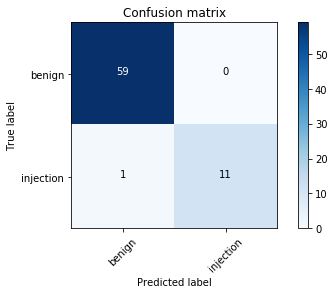

In [23]:
plot_confusion_matrix(confusion_matrix(y_test, y_pred), classes=['benign', 'injection'], normalize=False)

In [24]:
y_train[y_train == 1.0].shape

(38,)